PHASE 1:

Phase 1 of the project consists of obtaining the data and loading it in a dataframe, imputing missing values with the mean, and computing mean, median, and standard deviation for each of the attributes, as well as drawing histograms for each to observe their distributions.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


#load the dataset and read it into a dataframe
col = ["Scn", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "Class"] 
df = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',names = col)
df.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


Next, we check for missing values

In [44]:
df.isnull().sum()

Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
Class     0
dtype: int64

In [45]:
df["A7"]=(df["A7"].fillna(df["A7"].mean())) #replace missing values with mean

In [46]:
#create list of the following statistics in case we would like to return to them later
mean=[]
median=[]
std=[]
var=[]
    
#using a loop, calculate mean, median, std and variance for each of the attributes (columns A2-A10)
s = 0
for i in range(2,11):
    mean.append(df["A"+str(i)].mean())
    median.append(df["A"+str(i)].median())
    std.append(df["A"+str(i)].std())
    var.append(df["A"+str(i)].var())
    print("\nAttribute A"+str(i),"-"*17)
    print("\tMean:\t\t\t\t",round(mean[s],1))
    print("\tMedian:\t\t\t\t",round(median[s],1))
    print("\tVariance:\t\t\t",round(var[s],1))
    print("\tStandard Deviation:\t\t",round(std[s],1))
    s+=1
    


Attribute A2 -----------------
	Mean:				 4.4
	Median:				 4.0
	Variance:			 7.9
	Standard Deviation:		 2.8

Attribute A3 -----------------
	Mean:				 3.1
	Median:				 1.0
	Variance:			 9.3
	Standard Deviation:		 3.1

Attribute A4 -----------------
	Mean:				 3.2
	Median:				 1.0
	Variance:			 8.8
	Standard Deviation:		 3.0

Attribute A5 -----------------
	Mean:				 2.8
	Median:				 1.0
	Variance:			 8.2
	Standard Deviation:		 2.9

Attribute A6 -----------------
	Mean:				 3.2
	Median:				 2.0
	Variance:			 4.9
	Standard Deviation:		 2.2

Attribute A7 -----------------
	Mean:				 3.5
	Median:				 1.0
	Variance:			 13.0
	Standard Deviation:		 3.6

Attribute A8 -----------------
	Mean:				 3.4
	Median:				 3.0
	Variance:			 5.9
	Standard Deviation:		 2.4

Attribute A9 -----------------
	Mean:				 2.9
	Median:				 1.0
	Variance:			 9.3
	Standard Deviation:		 3.1

Attribute A10 -----------------
	Mean:				 1.6
	Median:				 1.0
	Variance:			 2.9
	Standard Deviation:		 1.7


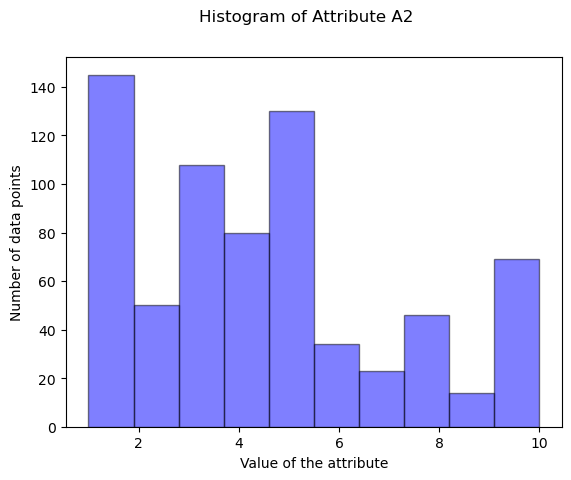

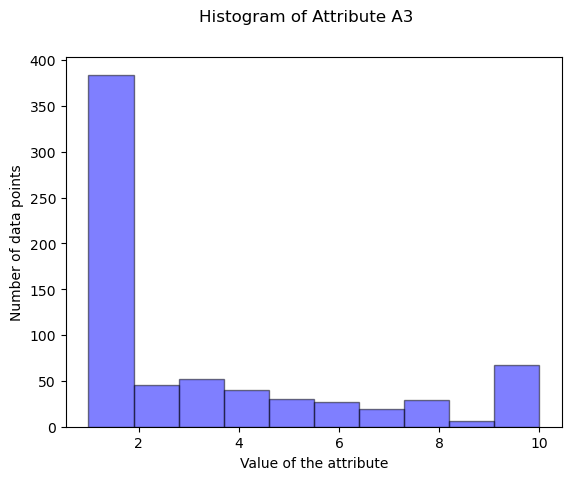

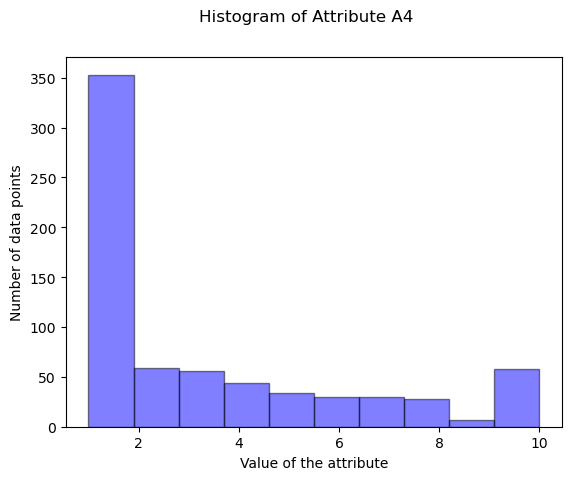

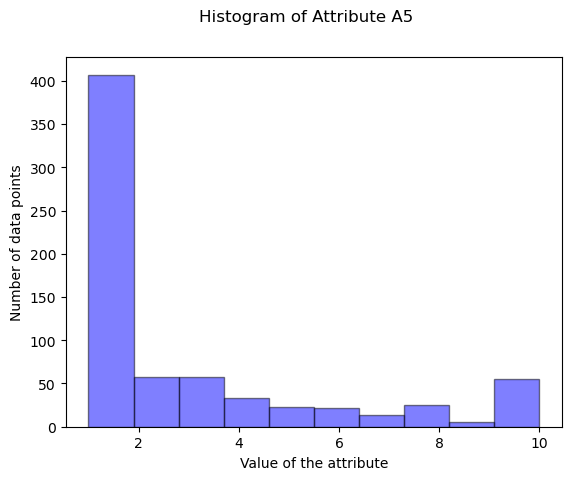

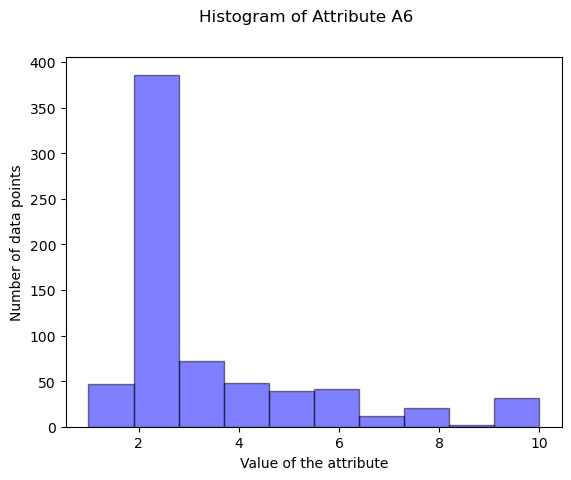

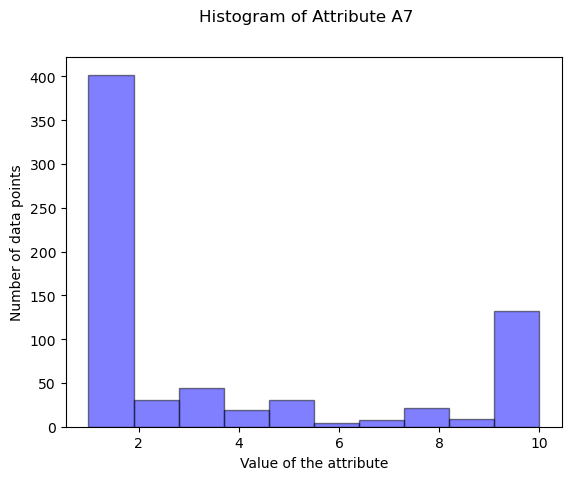

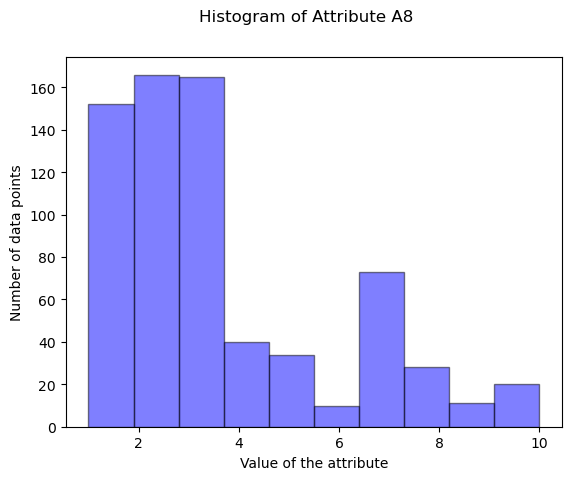

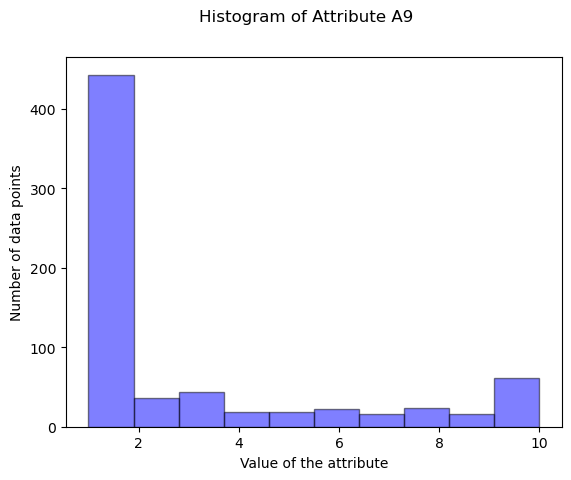

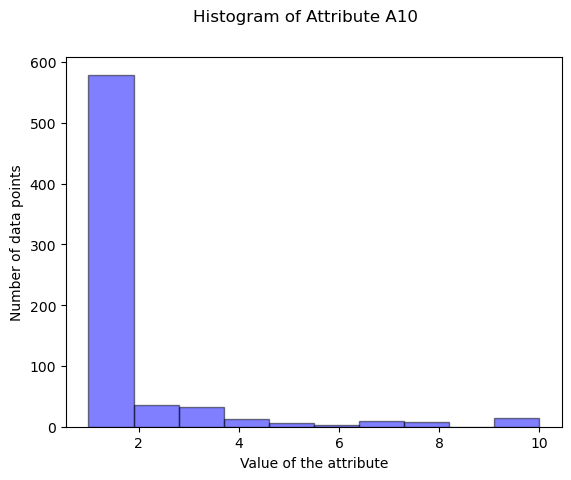

In [47]:
#using a second loop, create a figure and plot a histogram of each attribute A2-A10
for i in range(9):
     fig = plt.figure()
     fig.suptitle("Histogram of Attribute A"+str(i+2))
     sp = fig.add_subplot(1,1,1)
     plt.xlabel("Value of the attribute") 
     plt.ylabel("Number of data points")
     sp.hist(df["A"+str(i+2)],bins=10,color='blue',edgecolor='black',alpha=0.5)

PHASE 2:

Phase 2 is the phase that implements the k means algorithm. To begin, we randomly select two
initial centroids and calculate the Euclidian distance from the two centroids for all data points.
At this point, each data point is assigned to one of two clusters (2 for benign and 4 for
malignant). Following the assignment to the two clusters, we move on to the recompute step,
where we update the two centroids by taking the mean of cluster 2 data points and cluster 4
data points. The assign and recompute steps are repeated until one of two conditions is met:
until the centroids do not change or the steps are iterated 50 times. 

In [48]:
import numpy as np
def random_centroid(df, lower_limit, upper_limit): #generate random centroids
    u2 = np.random.randint(lower_limit,upper_limit)
    u4 = np.random.randint(lower_limit,upper_limit)
    centroid_1 = (df.iloc[u2])
    centroid_2 = (df.iloc[u4])
    return u2, u4, centroid_1, centroid_2

def euclidian(df,u2,u4): #Find Euclidian distance
    dist_u2 = ((df- u2.values)**2).sum(axis=1)
    dist_u2 = np.sqrt(dist_u2).round(2)
    dist_u4 = ((df - u4.values)**2).sum(axis=1)
    dist_u4 = np.sqrt(dist_u4).round(2)
    return dist_u2, dist_u4

def assign_to_cluster(dist_u2, dist_u4, predicted_df): #Assign data points to cluster 2 or 4
    diff = dist_u2 - dist_u4
    diff[diff>0] = 2
    diff[diff<0] = 4
    predicted_df["Predicted_Class"] = diff              #store predicted values in a column
    return predicted_df["Predicted_Class"]

def recompute(df,predicted_df):      #replace mu2 and mu4 with the means of their respective data points
    cluster2 = df[predicted_df["Predicted_Class"] == 2] 
    cluster4 = df[predicted_df["Predicted_Class"] == 4] 
    mu_2_mean = cluster2.mean()
    mu_4_mean = cluster4.mean()
    return mu_2_mean, mu_4_mean

df_without_SCNandClass = df.loc[:,"A2":"A10"]     #df with attributes only
predicted = pd.DataFrame(df,columns=["Scn","Class","Predicted_Class"]) #create a df where our predictions will go

u2, u4, centroid_1, centroid_2 = random_centroid(df_without_SCNandClass,0,len(df))
initial_centroid1 = centroid_1
initial_centroid2 = centroid_2
    
count=-1
prev1 = 0
prev2 = 0

#recompute step until one of the two conditions is met (either 50 iterations or the centroids do not change)
for i in range(51):
    dist_u2, dist_u4 = euclidian(df_without_SCNandClass,centroid_1,centroid_2)
    assign_to_cluster(dist_u2, dist_u4, predicted)
    mu_2_mean, mu_4_mean = recompute(df_without_SCNandClass, predicted)
    centroid_1, centroid_2 = mu_2_mean, mu_4_mean
    count+=1
       
    if centroid_1.equals(prev2) and centroid_2.equals(prev1):
        break
    prev1 = centroid_1
    prev2 = centroid_2
    
print("Initial centroid mu_2:\n")
print(initial_centroid1)
print("Initial centroid mu_4:\n")
print(initial_centroid2)
print("\nProgram ended after",count,"iterations.")
print("\nFinal centroid mu_2\n")
print(centroid_1)
print("\nFinal centroid mu_4\n")
print(centroid_2)
print(predicted.head(21))


Initial centroid mu_2:

A2     2.0
A3     3.0
A4     2.0
A5     2.0
A6     2.0
A7     2.0
A8     3.0
A9     1.0
A10    1.0
Name: 408, dtype: float64
Initial centroid mu_4:

A2     5.0
A3     4.0
A4     5.0
A5     1.0
A6     8.0
A7     1.0
A8     3.0
A9     6.0
A10    1.0
Name: 657, dtype: float64

Program ended after 4 iterations.

Final centroid mu_2

A2     7.158798
A3     6.798283
A4     6.729614
A5     5.733906
A6     5.472103
A7     7.873966
A8     6.103004
A9     6.077253
A10    2.549356
dtype: float64

Final centroid mu_4

A2     3.047210
A3     1.302575
A4     1.446352
A5     1.343348
A6     2.087983
A7     1.380001
A8     2.105150
A9     1.261803
A10    1.109442
dtype: float64
        Scn  Class  Predicted_Class
0   1000025      2              4.0
1   1002945      2              2.0
2   1015425      2              4.0
3   1016277      2              2.0
4   1017023      2              4.0
5   1017122      4              2.0
6   1018099      2              4.0
7   1018561      

PHASE 3:

In phase 3 we analyze how well the clustering worked by calculating the individual and total
error rates. To do so, we calculate the number of data points that were incorrectly predicted as
class 2 when the correct class was 4, and vice versa, and divided by the number of class 2 data
points and class 4 data points respectively. Finally, for the total error rate, we divide the total
number of data points with predicted classes that do not equal the actual class by the total
number of data points. Moreover, since the k means algorithm suffers from poor initialization,
clusters are sometimes swapped; if the total error rate is greater than 50%, then the program
swaps the predicted clusters and then calculates the error rates. 

In [49]:
#identify where the predicted class is 2 and where the predicted class is 4
pred2 = predicted.loc[predicted["Predicted_Class"]==2]
pred4 = predicted.loc[predicted["Predicted_Class"]==4]
    
#identify erronous class 2 predictions
error_24 = pred2.loc[pred2["Class"] == 4]

#identify erronous class 4 predictions
error_42 = pred4.loc[pred4["Class"] == 2]

#Calculate total error
error_all = len(error_24) + len(error_42)
class_all = len(predicted)
error_T = (error_all/class_all)*100
print("Total Errors:",round(error_T,1),"%")

#If our total error is greater than 50, that means we have to swap our clusters
if error_T > 50:
    print("Clusters are swapped!\nSwapping Predicted_Class")
    pred2, pred4 = pred4, pred2
        
    error_24 = pred2.loc[pred2["Class"] == 4].copy()
    error_42 = pred4.loc[pred4["Class"] == 2].copy()
    error_all = len(error_24) + len(error_42)
    error_T = (error_all/class_all)*100
    error_24["Predicted_Class"] = 2
    error_42["Predicted_Class"] = 4
        
    
pclass_2 = len(pred2)
pclass_4 = len(pred4)
class_all = len(predicted)
error_B = (len(error_24) / pclass_2)*100
error_M = (len(error_42) / pclass_4)*100
    
    
print("\nData points in Predicted Class 2:\t",pclass_2)
print("Data points in Predicted Class 4:\t",pclass_4)
    
print("\nError Data points, Predicted Class 2:")
print(error_24)
    
print("\nError Data points, Predicted Class 4:")
print(error_42)
    
print("\nNumber of all data points:\t",class_all)
print("\nNumber of error data points:\t",error_all)
    
print("\nError rate for class 2:\t",round(error_B,1),"%")
print("Error rate for class 4:\t",round(error_M,1),"%")
print("Total error rate:\t",round(error_T,1),"%")

Total Errors: 95.7 %
Clusters are swapped!
Swapping Predicted_Class

Data points in Predicted Class 2:	 466
Data points in Predicted Class 4:	 233

Error Data points, Predicted Class 2:
         Scn  Class  Predicted_Class
12   1041801      4                2
15   1047630      4                2
23   1057013      4                2
25   1065726      4                2
50   1108370      4                2
51   1108449      4                2
57   1113038      4                2
59   1113906      4                2
63   1116132      4                2
65   1116998      4                2
101  1167439      4                2
103  1168359      4                2
105  1169049      4                2
222  1226012      4                2
273   428903      4                2
348   832226      4                2
356   859164      4                2
455  1246562      4                2
489  1084139      4                2

Error Data points, Predicted Class 4:
         Scn  Class  Predicted_Clas

CONCLUSION

Although the program has its flaws, like poor initialization for the k means algorithm, it
was still able to correctly classify a patient as either class 2 or class 4 about 96% of the time. Based on
the 9 attributes (clump thickness, uniformity of cell size, uniformity of cell shape, marginal
adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli, and mitoses),
one can predict whether a particular patient’s tumor is benign or malignant, which could
potentially save lives if the cancer is detected early enough and followed with the appropriate
treatment.